In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

plt.jet()
%matplotlib inline

In [3]:
# available in mat: 'Udn3norm','Vdn3norm','Gdn','x','y','actID','XACT','YACT','nodeID'
mat = scipy.io.loadmat('data/myUdn3norm_72.mat')
Udn3norm = mat['Udn3norm']
Vdn3norm = mat['Vdn3norm']
bx = mat['x']
by = mat['y']
nodeID = mat['nodeID']

actID = mat['actID']
xact = mat['XACT']
yact = mat['YACT']
c = mat['c'] #this is the cosine of the angle between optical axis and surface normal

In [4]:
aa = np.hstack([nodeID, bx, by, Udn3norm])
np.savetxt('data/M2_1um_72_grid.txt', aa, fmt = '%.6e')

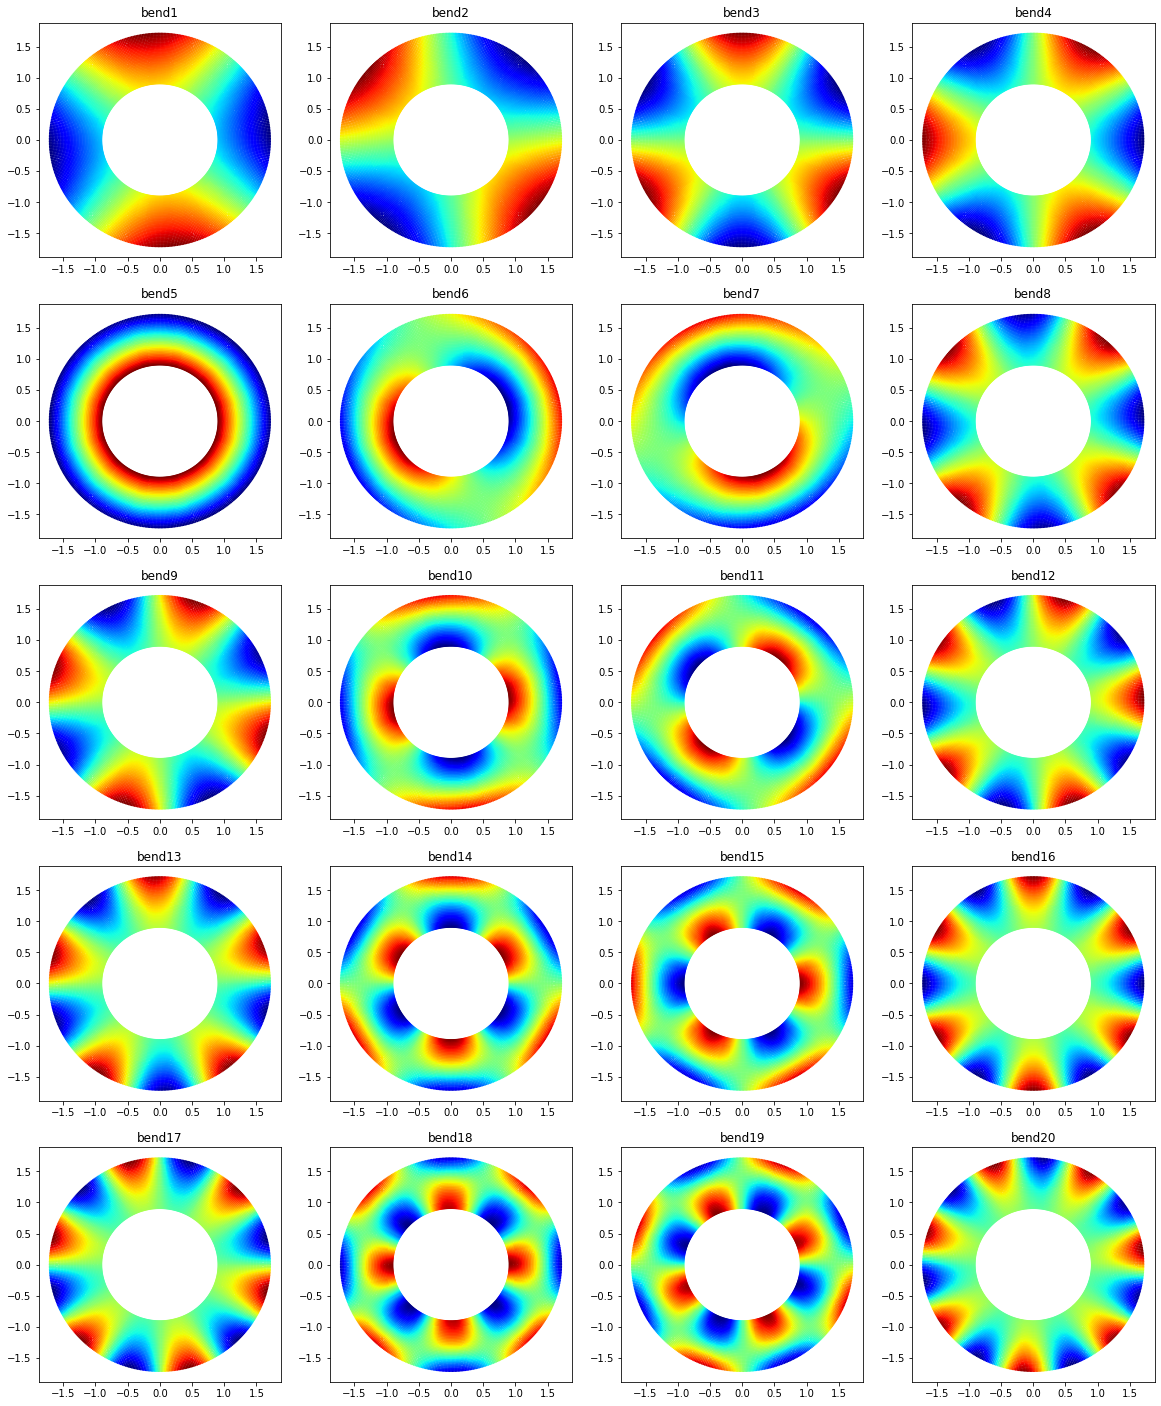

In [5]:
bx1 = np.squeeze(bx)
by1 = np.squeeze(by)
fig, ax = plt.subplots(5,4,figsize=(20,5*5))
i = 0
for modeID in range(1,21):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    img = ax[irow][icol].scatter(bx1,by1,1, Udn3norm[:,modeID-1])
    ax[irow][icol].set_title('bend%d'%modeID)

In [6]:
aa = np.hstack([nodeID, bx, by, Udn3norm/c])
np.savetxt('data/M2_1um_72_sag.txt', aa, fmt = '%.6e')

In [7]:
aa = np.hstack([actID.reshape(-1,1), xact.reshape(-1,1), yact.reshape(-1,1), Vdn3norm])
np.savetxt('data/M2_1um_72_force.txt', aa, fmt = '%.6e')